# Winner Prediction on 1D Data of Single Replays

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Testing with 100 Frame Interval Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [17]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# Define features (X) and target variable (y)
X = data.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = data['Winner']



In [18]:
print(data.columns.tolist())

['ReplayID', 'Duration', 'Frame', 'MapName', 'MapWidth', 'MapHeight', 'Player1_EAPM', 'Player1_ECmdCount', 'Player1_Race', 'Player2_EAPM', 'Player2_ECmdCount', 'Player2_Race', 'Player1_TotalUnits', 'Player1_AliveUnits', 'Player1_DestroyedUnits', 'Player1_Alive_Protoss Nexus', 'Player1_Alive_Protoss Probe', 'Player1_Alive_Protoss Arbiter', 'Player1_Alive_Protoss Arbiter Tribunal', 'Player1_Alive_Protoss Archon', 'Player1_Alive_Protoss Carrier', 'Player1_Alive_Protoss Citadel of Adun', 'Player1_Alive_Protoss Corsair', 'Player1_Alive_Protoss Cybernetics Core', 'Player1_Alive_Protoss Dark Templar', 'Player1_Alive_Protoss Dragoon', 'Player1_Alive_Protoss Fleet Beacon', 'Player1_Alive_Protoss Forge', 'Player1_Alive_Protoss Gateway', 'Player1_Alive_Protoss High Templar', 'Player1_Alive_Protoss Interceptor', 'Player1_Alive_Protoss Observatory', 'Player1_Alive_Protoss Observer', 'Player1_Alive_Protoss Photon Cannon', 'Player1_Alive_Protoss Pylon', 'Player1_Alive_Protoss Reaver', 'Player1_Alive_

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12139
           2       1.00      1.00      1.00     11575

    accuracy                           1.00     23714
   macro avg       1.00      1.00      1.00     23714
weighted avg       1.00      1.00      1.00     23714



In [21]:
X

,Duration,Frame,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player2_EAPM,Player2_ECmdCount,Player1_TotalUnits,Player1_AliveUnits,...,Player2_Protoss Air Weapons_Level,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,ReplayID_encoded,MapName_encoded
0,28603,0,96,128,168,3360,187,3743,5,2,...,0,0,0,0,0,0,0,0,1,163
1,28603,100,96,128,168,3360,187,3743,6,3,...,0,0,0,0,0,0,0,0,1,163
2,28603,200,96,128,168,3360,187,3743,6,3,...,0,0,0,0,0,0,0,0,1,163
3,28603,300,96,128,168,3360,187,3743,6,3,...,0,0,0,0,0,0,0,0,1,163
4,28603,400,96,128,168,3360,187,3743,6,3,...,0,0,0,0,0,0,0,0,1,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143687,50903,50400,128,128,196,6984,206,7333,386,79,...,0,0,2,0,0,0,0,1,363,4
143688,50903,50500,128,128,196,6984,206,7333,386,79,...,0,0,2,0,0,0,0,1,363,4
143689,50903,50600,128,128,196,6984,206,7333,390,83,...,0,0,2,0,0,0,0,1,363,4
143690,50903,50700,128,128,196,6984,206,7333,390,83,...,0,0,2,0,0,0,0,1,363,4


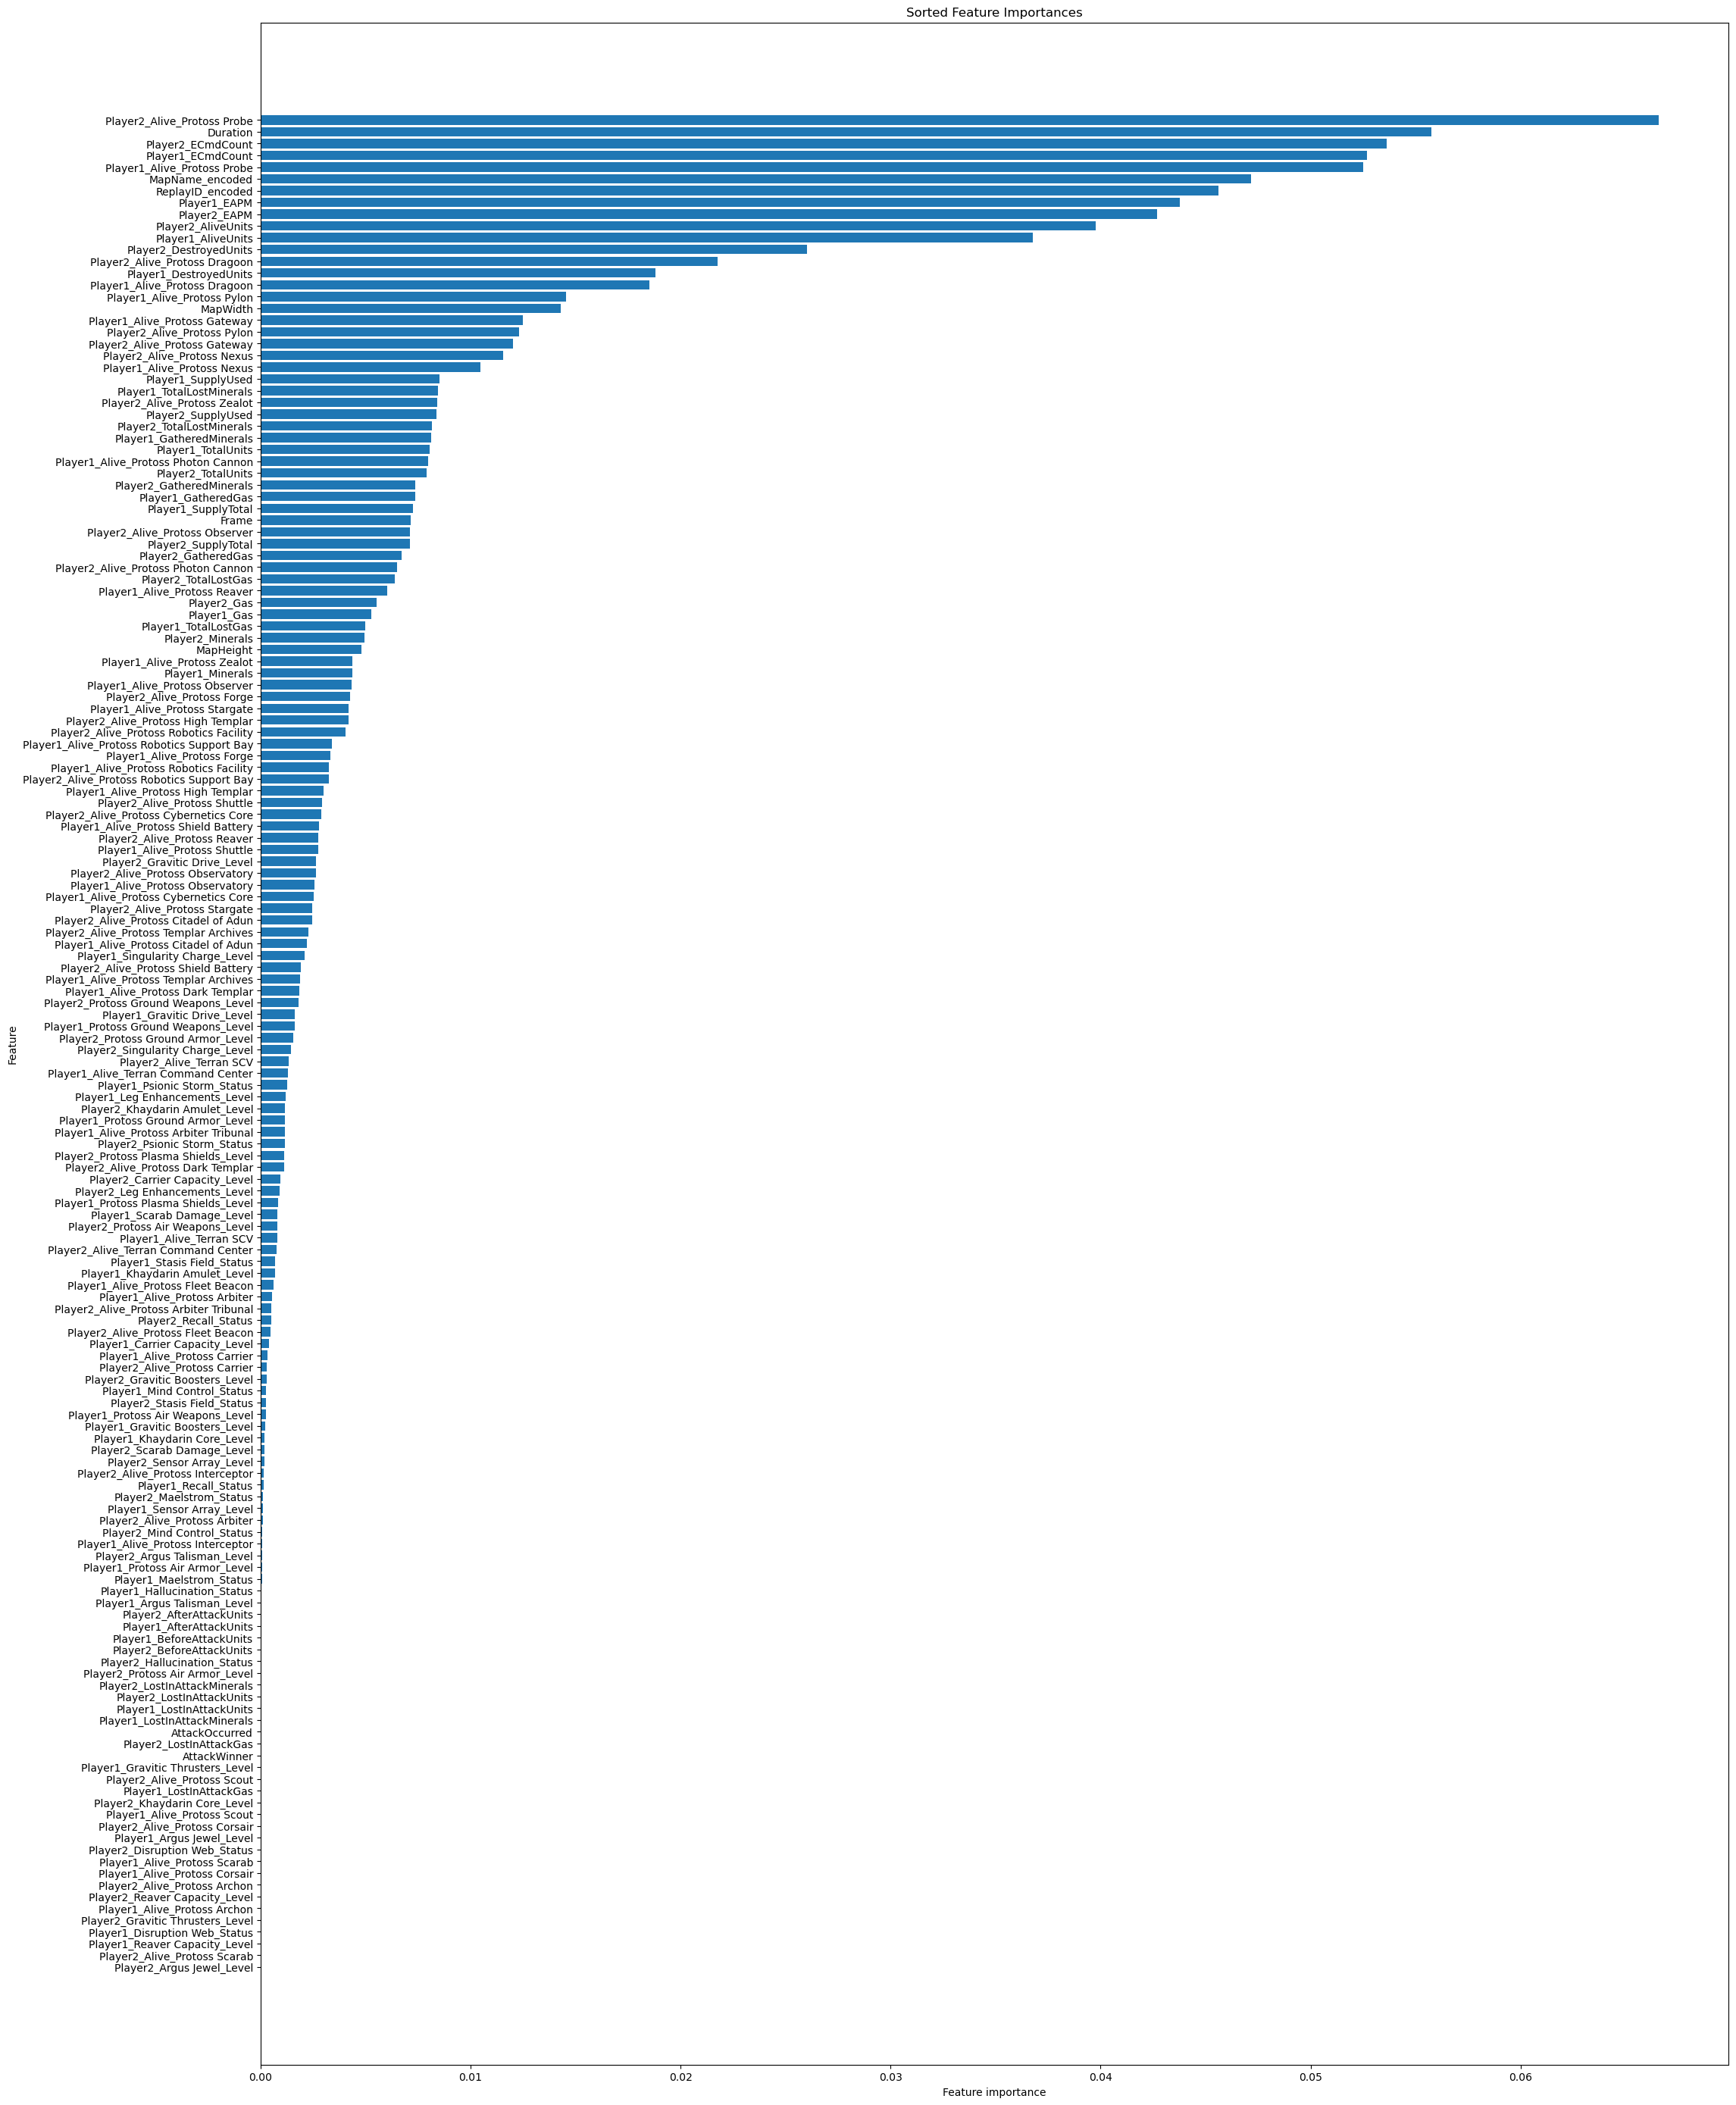

In [27]:
import matplotlib.pyplot as plt
import numpy as np
# Sort feature importances in descending order
sorted_indices = np.argsort(clf.feature_importances_)[::]
sorted_importances = clf.feature_importances_[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Plot the sorted feature importances
plt.figure(figsize=(25, 35))
plt.barh(range(n_features), sorted_importances, align='center')
plt.yticks(np.arange(n_features), sorted_features)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Sorted Feature Importances')
plt.show()


Testing

# Testing with last frame of each game

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [28]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

last_rows = data.groupby('ReplayID').tail(1)



In [30]:
last_rows

,ReplayID,Duration,Frame,MapName,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
285,GG10042,28603,28500,| iCCup | PeaksOfBeakdu,96,128,168,3360,Protoss,187,...,1,2,0,0,0,0,1,2,1,163
634,GG10043,34851,34800,| iCCup | Paranoid Android,96,96,182,4434,Protoss,171,...,2,2,0,0,0,0,1,2,2,162
1014,GG10056,37973,37900,WCG Gaia 1.1,128,128,148,3896,Protoss,169,...,3,3,1,0,0,0,1,1,3,70
1399,GG1010,38455,38400,Gauntlet2003,128,96,166,4463,Protoss,151,...,3,2,1,0,0,0,1,2,4,85
1647,GG10208,24752,24700,| iCCup | Monty Hall 1.1 o,128,128,165,2853,Protoss,153,...,0,1,0,0,0,0,1,2,5,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141806,TL89,30124,30000,The Lost Temple_Gamei,128,128,180,3800,Protoss,21,...,0,0,0,0,0,0,0,1,359,106
142344,TL900,53788,53700,Desert FoX,128,128,187,7027,Protoss,171,...,0,0,2,0,0,0,0,1,360,82
142690,TL937,34624,34500,신 백두대간 2.4,96,128,216,5225,Protoss,223,...,2,3,1,0,0,0,0,2,361,41
143182,TL959,49197,49100,Rush Hour Ⅲ,128,128,151,5181,Protoss,120,...,0,0,0,0,0,0,1,1,362,65


In [31]:
# Define features (X) and target variable (y)
X = last_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = last_rows['Winner']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           1       0.88      0.97      0.92        36
           2       0.97      0.86      0.91        37

    accuracy                           0.92        73
   macro avg       0.92      0.92      0.92        73
weighted avg       0.92      0.92      0.92        73



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.97297297 0.94594595 0.83783784 0.89189189 0.97222222 0.88888889
 0.88888889 0.97222222 0.88888889 0.88888889]
Mean accuracy: 0.914864864864865
Standard deviation of accuracy: 0.04481321725402981


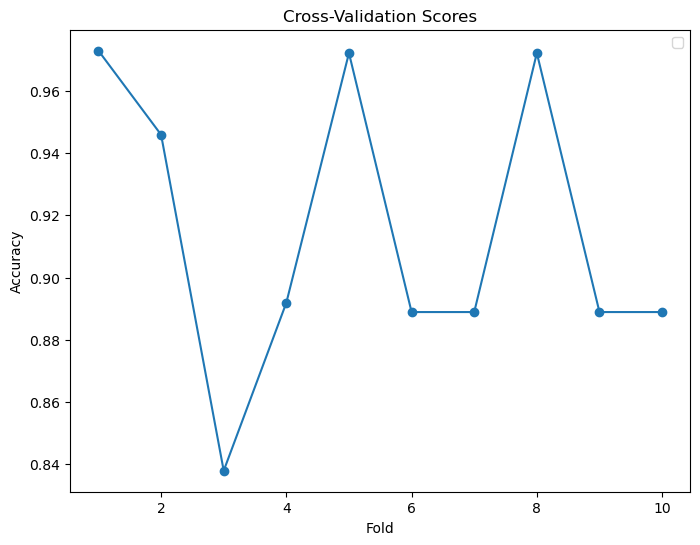

In [33]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.legend()
plt.show()


# Trying with PCA

In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

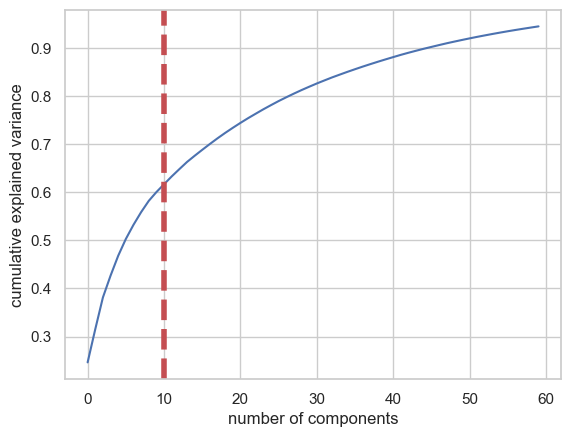

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.246316,0.246316
1,0.315254,0.068938
2,0.381199,0.065945
3,0.426469,0.045270
4,0.467801,0.041333
5,0.502676,0.034875
6,0.532104,0.029428
7,0.558437,0.026333
8,0.581857,0.023420
9,0.600109,0.018252


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=60)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(70))

In [37]:
pca = PCA(n_components=60)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [38]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
0,0.121567,0.097426,0.039204,0.016725,-0.007779,-0.096525,-0.047366,-0.171398,-0.004359,0.063904
1,0.129230,0.034333,0.032292,-0.030228,-0.004706,-0.005522,-0.068005,-0.228451,0.009058,0.057826
2,-0.013820,0.051896,0.032480,0.042521,-0.081397,0.049359,-0.041741,0.012174,0.022710,0.017133
3,-0.016457,0.021322,-0.000572,0.082239,0.008609,-0.001187,-0.017755,-0.041784,-0.041533,-0.008651
4,-0.010009,-0.057365,-0.004080,-0.064627,-0.025033,-0.034284,0.073453,0.100009,-0.040751,0.028942
...,...,...,...,...,...,...,...,...,...,...
153,-0.006238,0.052217,-0.006042,0.090696,-0.086002,-0.049238,-0.104087,-0.118483,-0.138742,0.008619
154,0.024146,-0.002134,0.011481,-0.072899,0.014795,-0.014383,-0.048756,-0.067472,-0.060164,-0.210676
155,0.064753,-0.059898,-0.121716,0.086873,-0.061946,0.019172,-0.036240,-0.021218,-0.137648,0.044464
156,-0.021903,0.004448,0.028997,-0.027000,-0.005237,0.041298,-0.004266,-0.026428,-0.071809,0.086041


In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)
display(rfc.score(X_train_scaled_pca, y_train))

1.0

In [40]:
y_pred_pca = rfc.predict(X_test_scaled_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred_pca))

Accuracy: 0.88
              precision    recall  f1-score   support

           1       0.86      0.89      0.88        36
           2       0.89      0.86      0.88        37

    accuracy                           0.88        73
   macro avg       0.88      0.88      0.88        73
weighted avg       0.88      0.88      0.88        73



Cross-validation scores: [0.86440678 0.86206897 0.84482759 0.86206897 0.81034483]
Cross-validation scores: [0.66666667 0.8        0.73333333 0.85714286 0.85714286]
Mean accuracy: 0.8487434248977206
Mean accuracy: 0.7828571428571429
Test set accuracy: 0.89


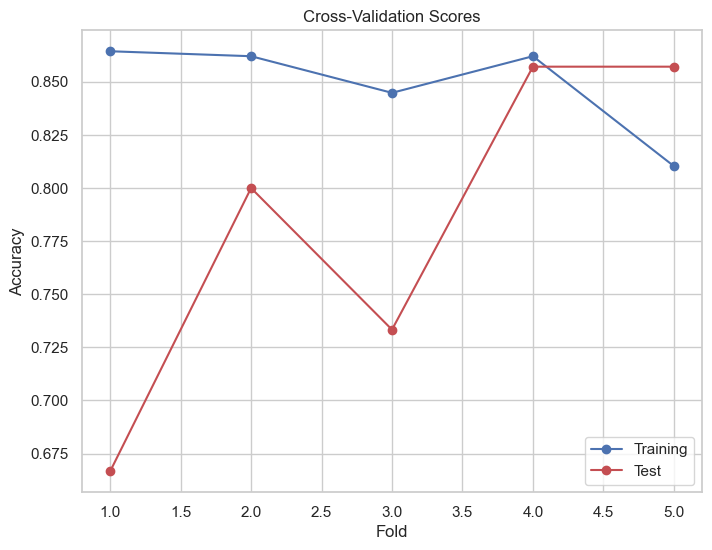

In [41]:
from sklearn.model_selection import cross_val_score

# Assuming X_train_scaled_pca and y_train are already defined

# Create a RandomForestClassifier
rfc = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rfc, X_train_scaled_pca, y_train, cv=5)  # cv is the number of folds
cv_scores2 = cross_val_score(rfc, X_test_scaled_pca, y_test, cv=5)  # cv is the number of folds

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Cross-validation scores:", cv_scores2)
print("Mean accuracy:", cv_scores.mean())
print("Mean accuracy:", cv_scores2.mean())

# Fit the model on the entire training set
rfc.fit(X_train_scaled_pca, y_train)

# Evaluate the model on the test set
test_accuracy = rfc.score(X_test_scaled_pca, y_test)
print(f'Test set accuracy: {test_accuracy:.2f}')

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='Training')
plt.plot(range(1, len(cv_scores2) + 1), cv_scores2, marker='o', linestyle='-', color='r', label='Test')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.legend()
plt.show()


# Cross validation on training

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.97297297 0.94594595 0.83783784 0.89189189 0.97222222 0.88888889
 0.88888889 0.97222222 0.88888889 0.88888889]
Mean accuracy: 0.914864864864865
Standard deviation of accuracy: 0.04481321725402981


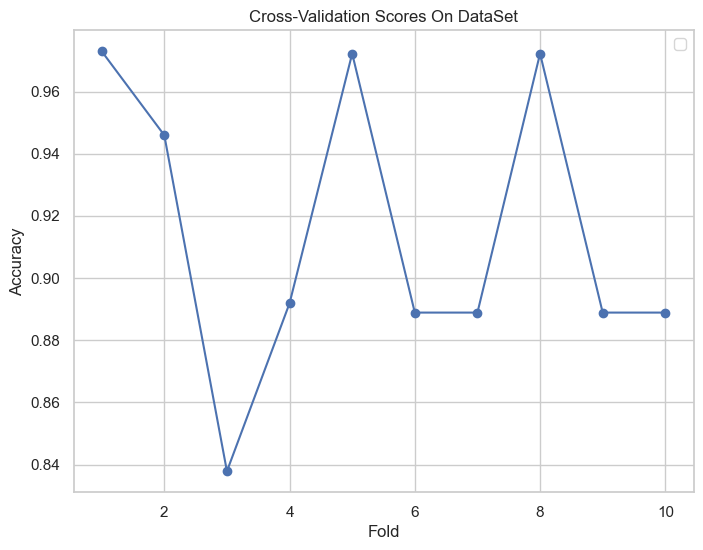

In [45]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores On DataSet')
plt.legend()
plt.show()

# Testing with after 80% of each game

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [68]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.8)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)


In [48]:
nearest_rows

,ReplayID,Duration,Frame,MapName,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
0,GG10,20568,16400,Blade Storm,128,128,140,2001,Protoss,105,...,0,1,0,0,0,0,1,2,0,80
1,GG10042,28603,22800,| iCCup | PeaksOfBeakdu,96,128,168,3360,Protoss,187,...,1,1,0,0,0,0,1,2,1,163
2,GG10043,34851,27800,| iCCup | Paranoid Android,96,96,182,4434,Protoss,171,...,1,1,0,0,0,0,1,2,2,162
3,GG10056,37973,30300,WCG Gaia 1.1,128,128,148,3896,Protoss,169,...,2,3,0,0,0,0,1,1,3,70
4,GG1010,38455,30700,Gauntlet2003,128,96,166,4463,Protoss,151,...,2,1,1,0,0,0,1,2,4,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,TL89,30124,24000,The Lost Temple_Gamei,128,128,180,3800,Protoss,21,...,0,0,0,0,0,0,0,1,359,106
360,TL900,53788,43000,Desert FoX,128,128,187,7027,Protoss,171,...,0,0,1,0,0,0,0,1,360,82
361,TL937,34624,27600,신 백두대간 2.4,96,128,216,5225,Protoss,223,...,1,3,0,0,0,0,0,2,361,41
362,TL959,49197,39300,Rush Hour Ⅲ,128,128,151,5181,Protoss,120,...,0,0,0,0,0,0,1,1,362,65


In [49]:
# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           1       0.78      0.89      0.83        35
           2       0.88      0.76      0.82        38

    accuracy                           0.82        73
   macro avg       0.83      0.82      0.82        73
weighted avg       0.83      0.82      0.82        73



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.91891892 0.86486486 0.81081081 0.81081081 0.94444444 0.77777778
 0.72222222 0.86111111 0.83333333 0.83333333]
Mean accuracy: 0.8377627627627626
Standard deviation of accuracy: 0.061389610071780926


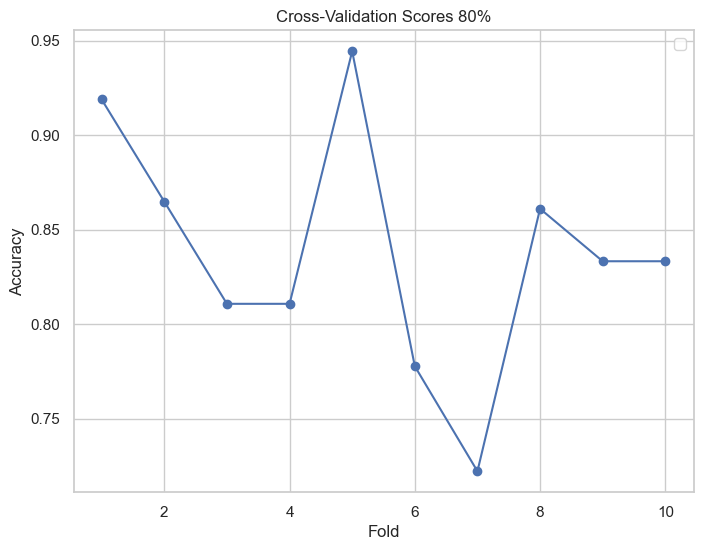

In [51]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

cv_scores80 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores 80%')
plt.legend()
plt.show()


# Testing with after 60% of each game

In [53]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 60th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_60_grouped = data.groupby('ReplayID')['Frame'].quantile(0.6)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_60_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)


In [54]:
nearest_rows

,ReplayID,Duration,Frame,MapName,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
0,GG10,20568,12300,Blade Storm,128,128,140,2001,Protoss,105,...,0,1,0,0,0,0,1,2,0,80
1,GG10042,28603,17100,| iCCup | PeaksOfBeakdu,96,128,168,3360,Protoss,187,...,0,0,0,0,0,0,1,2,1,163
2,GG10043,34851,20900,| iCCup | Paranoid Android,96,96,182,4434,Protoss,171,...,0,0,0,0,0,0,1,2,2,162
3,GG10056,37973,22700,WCG Gaia 1.1,128,128,148,3896,Protoss,169,...,1,2,0,0,0,0,1,1,3,70
4,GG1010,38455,23000,Gauntlet2003,128,96,166,4463,Protoss,151,...,1,1,0,0,0,0,1,2,4,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,TL89,30124,18000,The Lost Temple_Gamei,128,128,180,3800,Protoss,21,...,0,0,0,0,0,0,0,1,359,106
360,TL900,53788,32200,Desert FoX,128,128,187,7027,Protoss,171,...,0,0,0,0,0,0,0,1,360,82
361,TL937,34624,20700,신 백두대간 2.4,96,128,216,5225,Protoss,223,...,0,2,0,0,0,0,0,2,361,41
362,TL959,49197,29500,Rush Hour Ⅲ,128,128,151,5181,Protoss,120,...,0,0,0,0,0,0,1,1,362,65


In [55]:
# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.73
              precision    recall  f1-score   support

           1       0.71      0.71      0.71        35
           2       0.74      0.74      0.74        38

    accuracy                           0.73        73
   macro avg       0.73      0.73      0.73        73
weighted avg       0.73      0.73      0.73        73



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.78378378 0.81081081 0.67567568 0.81081081 0.86111111 0.77777778
 0.66666667 0.88888889 0.75       0.72222222]
Mean accuracy: 0.7747747747747747
Standard deviation of accuracy: 0.06931588619838064


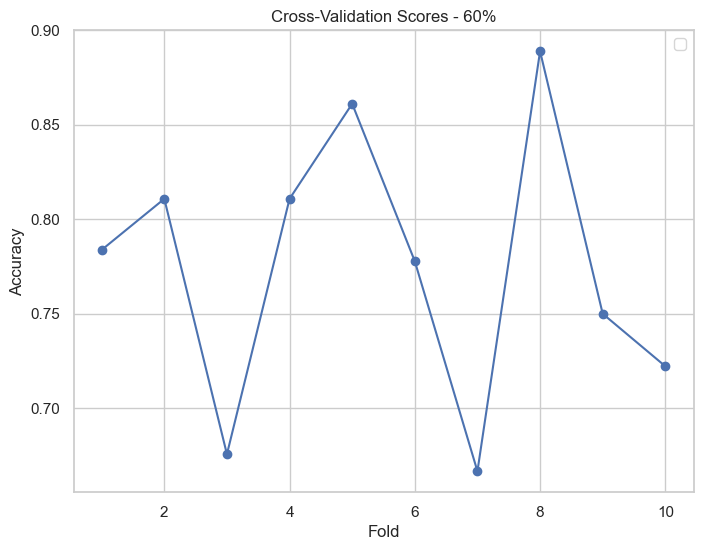

In [57]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())
cv_scores60 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores - 60%')
plt.legend()
plt.show()


# Testing with after 40% of each game

In [58]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 40th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_40_grouped = data.groupby('ReplayID')['Frame'].quantile(0.4)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_40_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)


In [59]:
nearest_rows

,ReplayID,Duration,Frame,MapName,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
0,GG10,20568,8200,Blade Storm,128,128,140,2001,Protoss,105,...,0,0,0,0,0,0,0,2,0,80
1,GG10042,28603,11400,| iCCup | PeaksOfBeakdu,96,128,168,3360,Protoss,187,...,0,0,0,0,0,0,0,2,1,163
2,GG10043,34851,13900,| iCCup | Paranoid Android,96,96,182,4434,Protoss,171,...,0,0,0,0,0,0,1,2,2,162
3,GG10056,37973,15200,WCG Gaia 1.1,128,128,148,3896,Protoss,169,...,0,1,0,0,0,0,1,1,3,70
4,GG1010,38455,15400,Gauntlet2003,128,96,166,4463,Protoss,151,...,0,1,0,0,0,0,1,2,4,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,TL89,30124,12000,The Lost Temple_Gamei,128,128,180,3800,Protoss,21,...,0,0,0,0,0,0,0,1,359,106
360,TL900,53788,21500,Desert FoX,128,128,187,7027,Protoss,171,...,0,0,0,0,0,0,0,1,360,82
361,TL937,34624,13800,신 백두대간 2.4,96,128,216,5225,Protoss,223,...,0,0,0,0,0,0,0,2,361,41
362,TL959,49197,19600,Rush Hour Ⅲ,128,128,151,5181,Protoss,120,...,0,0,0,0,0,0,1,1,362,65


In [60]:
# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

           1       0.72      0.80      0.76        35
           2       0.79      0.71      0.75        38

    accuracy                           0.75        73
   macro avg       0.76      0.76      0.75        73
weighted avg       0.76      0.75      0.75        73



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.72972973 0.78378378 0.75675676 0.72972973 0.86111111 0.58333333
 0.75       0.83333333 0.72222222 0.61111111]
Mean accuracy: 0.7361111111111113
Standard deviation of accuracy: 0.0819813288537272


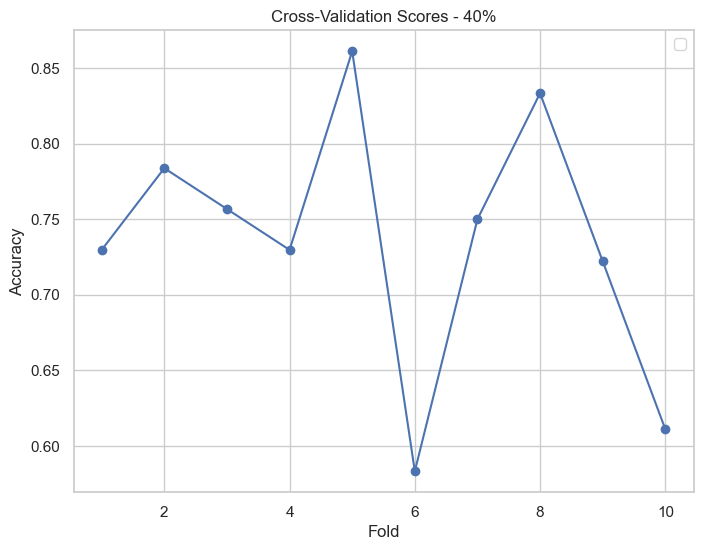

In [62]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())
cv_scores40 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores - 40%')
plt.legend()
plt.show()


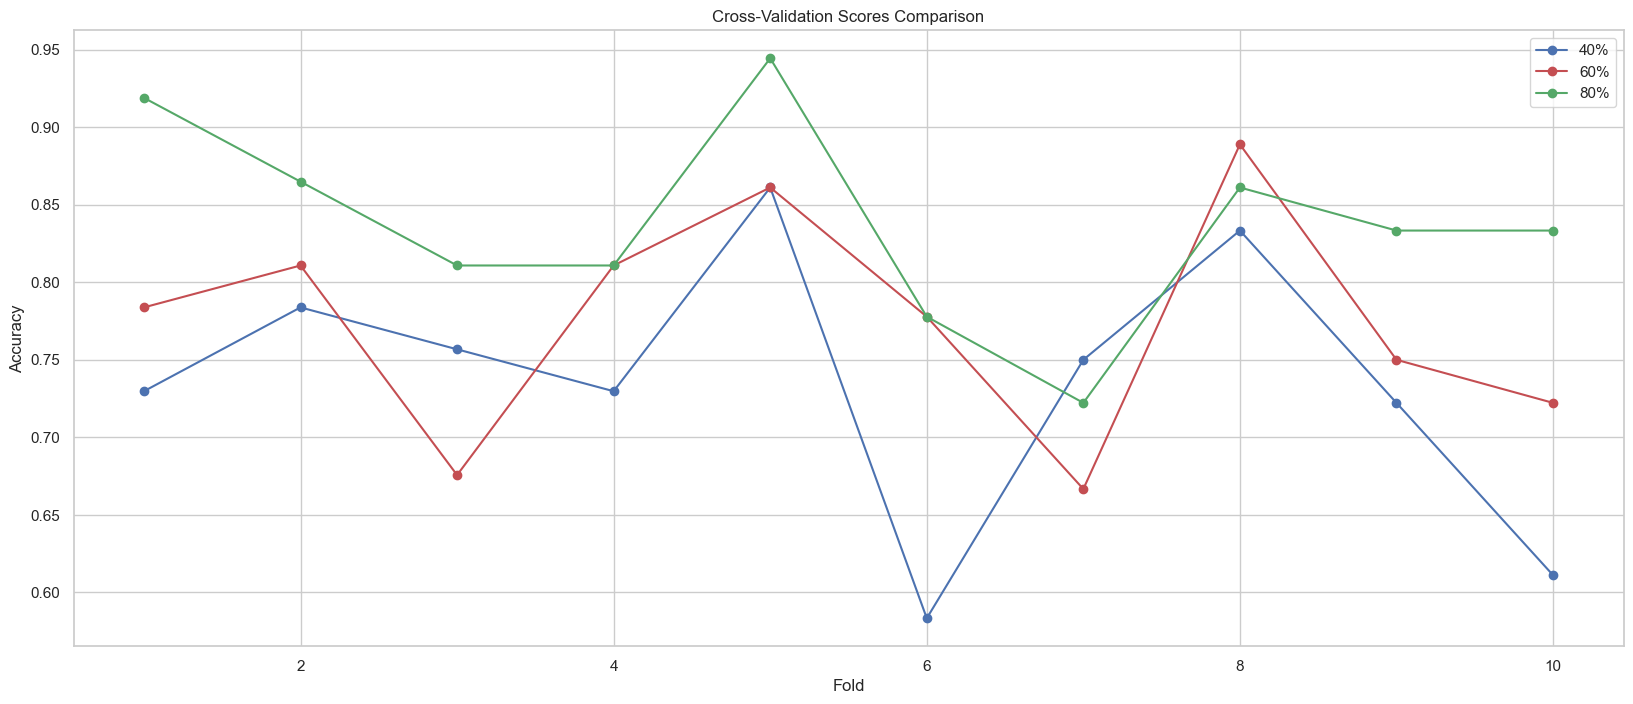

In [63]:
plt.figure(figsize=(20, 8))
plt.plot(range(1, len(cv_scores40) + 1), cv_scores40, marker='o', linestyle='-', color='b', label='40%')
plt.plot(range(1, len(cv_scores60) + 1), cv_scores60, marker='o', linestyle='-', color='r', label='60%')
plt.plot(range(1, len(cv_scores80) + 1), cv_scores80, marker='o', linestyle='-', color='g', label='80%')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores Comparison')
plt.legend()
plt.show()

# Function for getting points for each % of game

In [243]:
[str(i*10) + "%" for i in range(1,11)]

['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']

0.1
Cross-validation scores: [0.7027027  0.7027027  0.75675676 0.72972973 0.77777778 0.61111111
 0.75       0.69444444 0.66666667 0.63888889]
Mean accuracy: 0.7030780780780781
Standard deviation of accuracy: 0.050350978459635265
0.2
Cross-validation scores: [0.59459459 0.64864865 0.7027027  0.78378378 0.80555556 0.66666667
 0.77777778 0.72222222 0.69444444 0.75      ]
Mean accuracy: 0.7146396396396397
Standard deviation of accuracy: 0.06321254448869852
0.3
Cross-validation scores: [0.67567568 0.75675676 0.67567568 0.62162162 0.83333333 0.63888889
 0.80555556 0.69444444 0.72222222 0.55555556]
Mean accuracy: 0.697972972972973
Standard deviation of accuracy: 0.08034299386586238
0.4
Cross-validation scores: [0.72972973 0.78378378 0.75675676 0.72972973 0.86111111 0.58333333
 0.75       0.83333333 0.72222222 0.61111111]
Mean accuracy: 0.7361111111111113
Standard deviation of accuracy: 0.0819813288537272
0.5
Cross-validation scores: [0.67567568 0.78378378 0.64864865 0.72972973 0.83333333 0.69

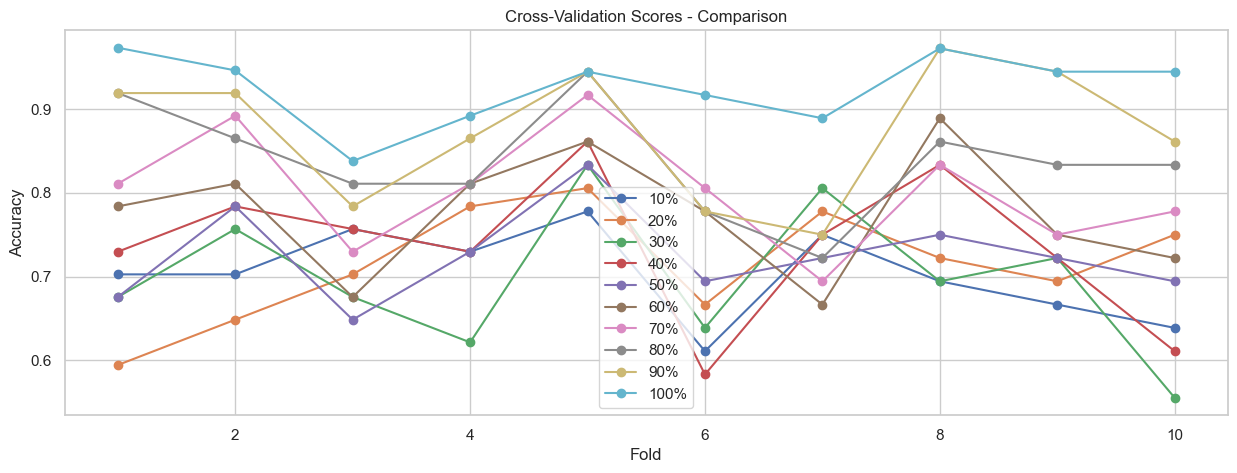

In [73]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

def calculate_for_per(per):
    # Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
    percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(per)

    # Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
    def find_nearest_row(group):
        nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
        return group.loc[[nearest_index]]

    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

    # Reset the index if needed
    nearest_rows.reset_index(drop=True, inplace=True)

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X, y, cv=10)

    # Print cross-validation scores
    print("Cross-validation scores:", cv_scores)

    # Calculate and print the mean accuracy and standard deviation of the cross-validation scores
    print("Mean accuracy:", cv_scores.mean())
    print("Standard deviation of accuracy:", cv_scores.std())

    # Return cross-validation scores
    return cv_scores


plt.figure(figsize=(15, 5))
for i in range(10, 110, 10):
    print(i / 100)
    temp = calculate_for_per(i / 100)
    plt.plot(range(1, len(temp) + 1), temp, marker='o', linestyle='-', label=str(i) + "%")
    
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores - Comparison')
plt.legend()
plt.show()   


0.1
Accuracy: 0.64
0.2
Accuracy: 0.70
0.3
Accuracy: 0.75
0.4
Accuracy: 0.75
0.5
Accuracy: 0.77
0.6
Accuracy: 0.73
0.7
Accuracy: 0.82
0.8
Accuracy: 0.82
0.9
Accuracy: 0.82
1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.90


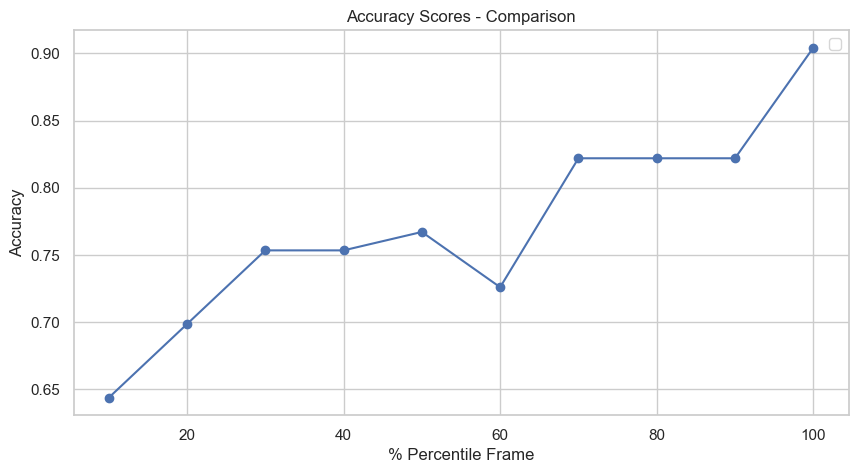

In [72]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])


def calculate_for_per2(per):
    # Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
    percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(per)

    # Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
    def find_nearest_row(group):
        nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
        return group.loc[[nearest_index]]

    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

    # Reset the index if needed
    nearest_rows.reset_index(drop=True, inplace=True)

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Return cross-validation scores
    return accuracy


plt.figure(figsize=(10, 5))
temp = []
for i in range(10, 110, 10):
    print(i / 100)
    temp.append(calculate_for_per2(i / 100))

plt.plot(range(10, 110, 10),temp, marker='o', linestyle='-')
    
plt.xlabel('% Percentile Frame')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()


# Random Forest Parameter Tuning

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [75]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.8)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)


In [76]:
nearest_rows

,ReplayID,Duration,Frame,MapName,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
0,GG10,20568,16400,Blade Storm,128,128,140,2001,Protoss,105,...,0,1,0,0,0,0,1,2,0,80
1,GG10042,28603,22800,| iCCup | PeaksOfBeakdu,96,128,168,3360,Protoss,187,...,1,1,0,0,0,0,1,2,1,163
2,GG10043,34851,27800,| iCCup | Paranoid Android,96,96,182,4434,Protoss,171,...,1,1,0,0,0,0,1,2,2,162
3,GG10056,37973,30300,WCG Gaia 1.1,128,128,148,3896,Protoss,169,...,2,3,0,0,0,0,1,1,3,70
4,GG1010,38455,30700,Gauntlet2003,128,96,166,4463,Protoss,151,...,2,1,1,0,0,0,1,2,4,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,TL89,30124,24000,The Lost Temple_Gamei,128,128,180,3800,Protoss,21,...,0,0,0,0,0,0,0,1,359,106
360,TL900,53788,43000,Desert FoX,128,128,187,7027,Protoss,171,...,0,0,1,0,0,0,0,1,360,82
361,TL937,34624,27600,신 백두대간 2.4,96,128,216,5225,Protoss,223,...,1,3,0,0,0,0,0,2,361,41
362,TL959,49197,39300,Rush Hour Ⅲ,128,128,151,5181,Protoss,120,...,0,0,0,0,0,0,1,1,362,65


In [77]:
# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

In [80]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8350672121566337


In [85]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, random_state=42)

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(bootstrap= True, max_depth=10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           1       0.79      0.89      0.84        35
           2       0.88      0.79      0.83        38

    accuracy                           0.84        73
   macro avg       0.84      0.84      0.84        73
weighted avg       0.84      0.84      0.84        73



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.89189189 0.89189189 0.78378378 0.81081081 0.94444444 0.77777778
 0.77777778 0.88888889 0.86111111 0.77777778]
Mean accuracy: 0.8406156156156157
Standard deviation of accuracy: 0.058951910955309654


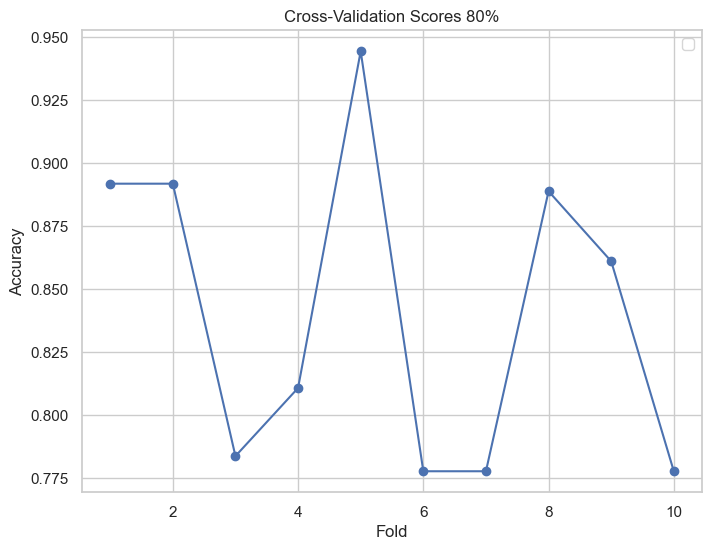

In [87]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

cv_scores80 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores 80%')
plt.legend()
plt.show()


# Trying RandomizedSearch CV for Random Forest

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
import time
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [89]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# last_rows = data.groupby('ReplayID').tail(70).groupby('ReplayID').head(1)

# Calculate the 80th percentile of the 'Frame' column within each group of 'ReplayID'
percentile_80_grouped = data.groupby('ReplayID')['Frame'].quantile(0.8)

# Define a function to find the row with the closest 'Frame' value to the 80th percentile within each group
def find_nearest_row(group):
    nearest_index = (group['Frame'] - percentile_80_grouped[group.name]).abs().idxmin()
    return group.loc[[nearest_index]]

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data.groupby('ReplayID', group_keys=False).apply(find_nearest_row)

# Reset the index if needed
nearest_rows.reset_index(drop=True, inplace=True)


In [90]:
# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [92]:
clf = RandomForestClassifier(n_estimators=100)
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(10, 300),
              "max_features": sp_randint(5, 200),
              "min_samples_split": sp_randint(2, 50),
              "bootstrap": [False],
              "criterion": ["gini", "entropy"],
             "random_state":sp_randint(0, 15)}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time.time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 52.32 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.830 (std: 0.033)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 23, 'min_samples_split': 30, 'random_state': 3}

Model with rank: 2
Mean validation score: 0.805 (std: 0.050)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 47, 'max_features': 54, 'min_samples_split': 20, 'random_state': 8}

Model with rank: 3
Mean validation score: 0.799 (std: 0.032)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 155, 'max_features': 62, 'min_samples_split': 13, 'random_state': 2}



In [93]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=12,
                       max_features=23, min_samples_split=30, random_state=3)

In [100]:
rd_forest_clf = RandomForestClassifier(bootstrap=False, criterion= 'entropy', max_depth=12,max_features=23, min_samples_split=30, random_state= 63).fit(X_train,y_train)
predicted_rd_forest = rd_forest_clf.predict(X_test)
print("Accuracy of the prediction for the binary decision tree:",int(metrics.f1_score(y_test, predicted_rd_forest,average='micro')*100), "%")

Accuracy of the prediction for the binary decision tree: 83 %


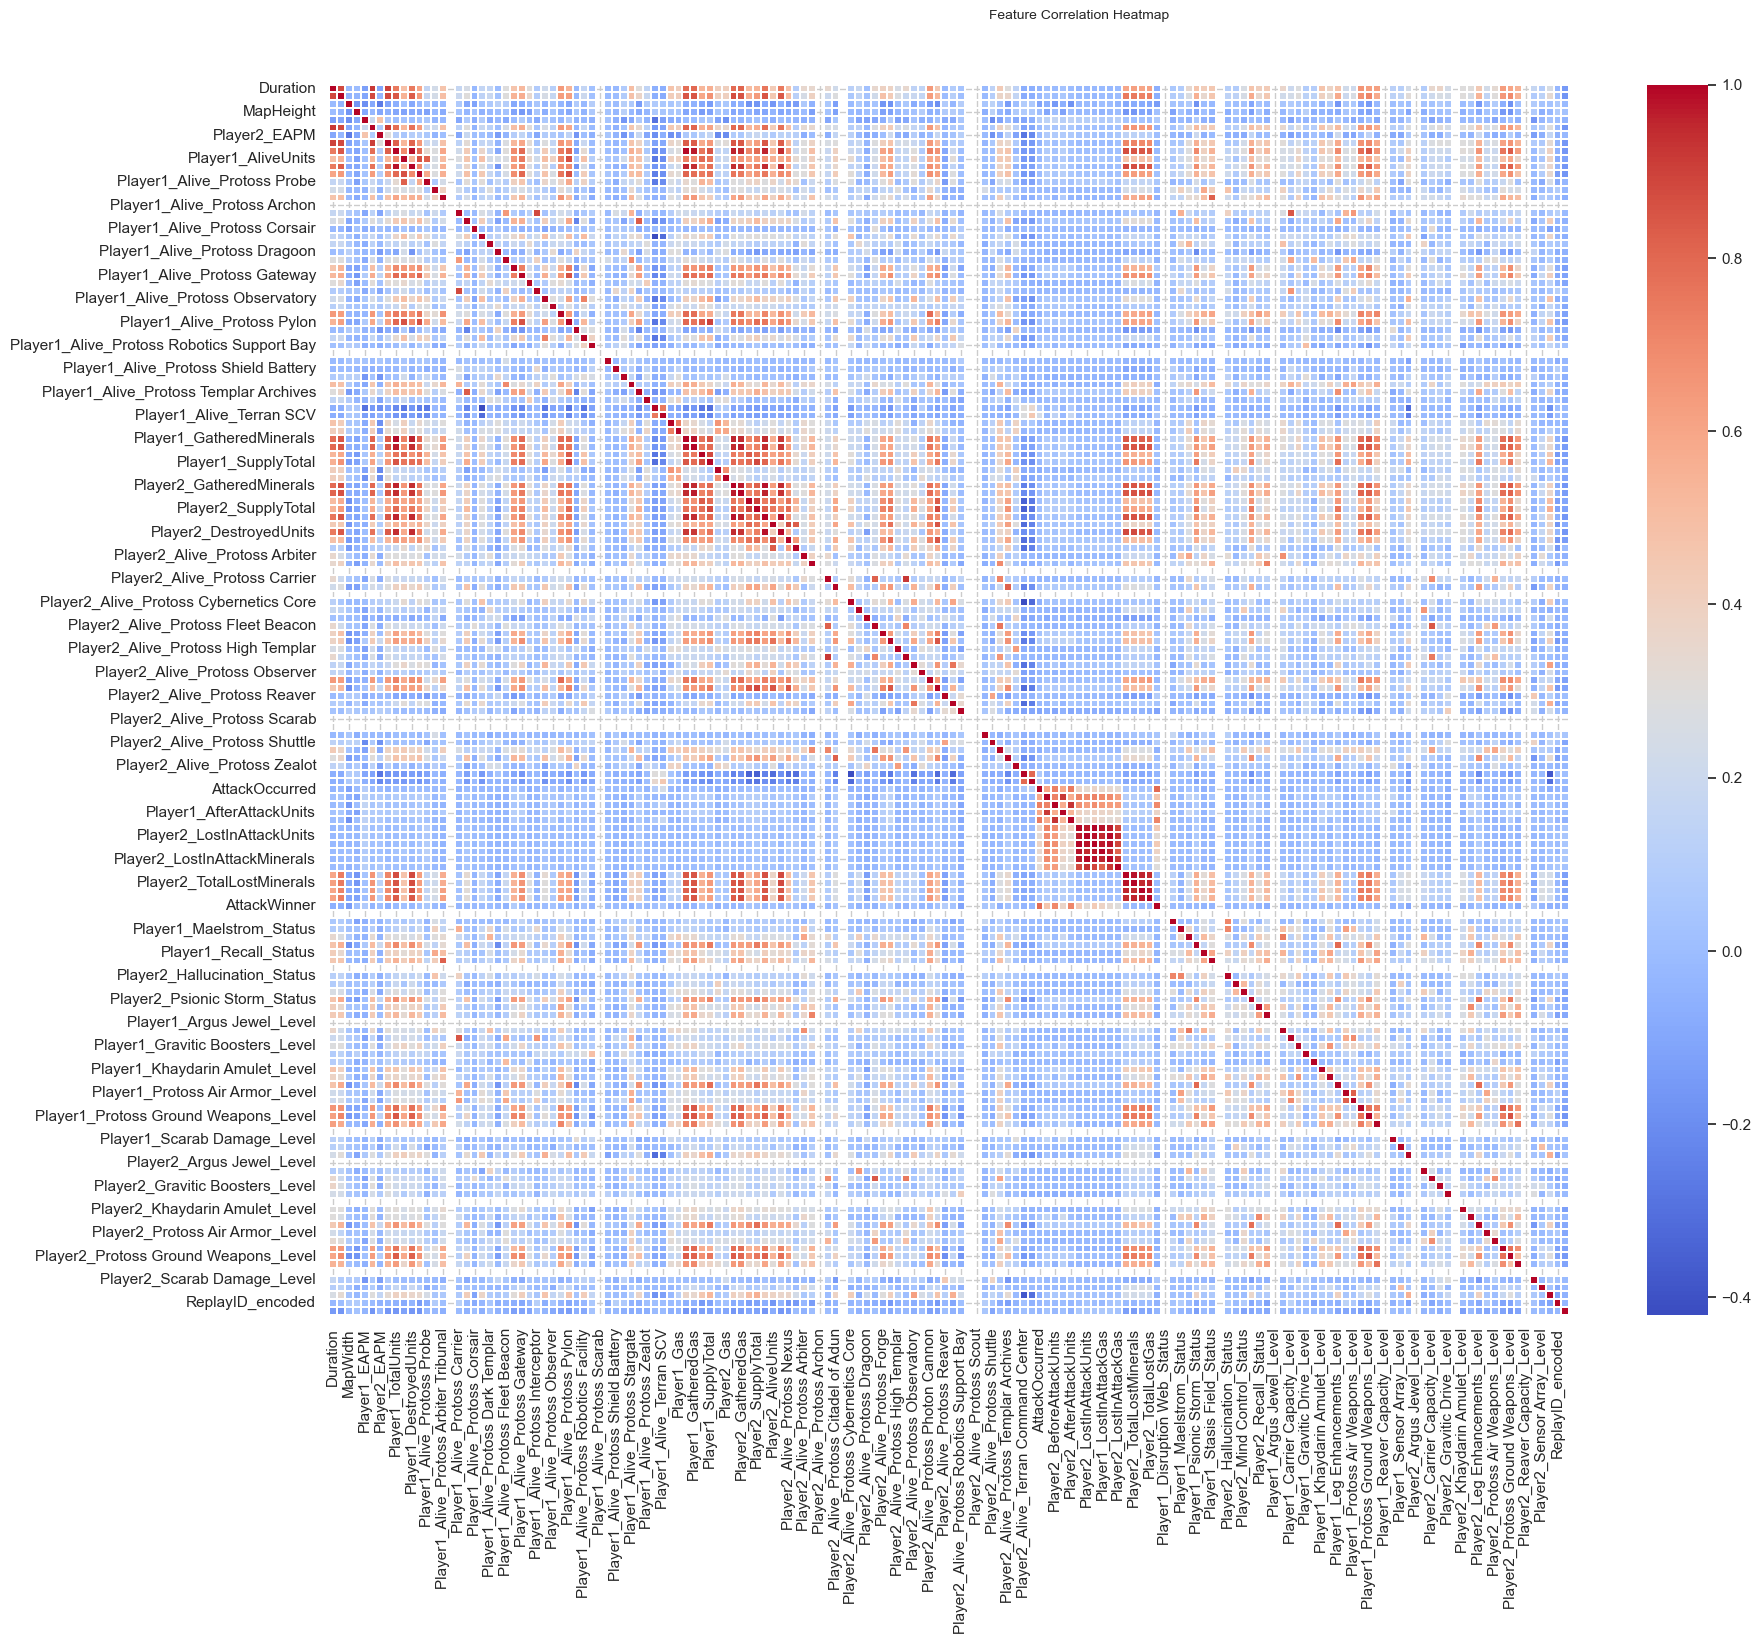

In [101]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(20, 15))
corr = X.corr()
hm = sns.heatmap(round(corr,2), annot=False, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Feature Correlation Heatmap', fontsize=10)

plt.savefig('Feature Correlation Heatmap.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cross-validation scores: [0.89189189 0.89189189 0.81081081 0.7027027  0.94444444 0.80555556
 0.75       0.86111111 0.86111111 0.77777778]
Mean accuracy: 0.8297297297297298
Standard deviation of accuracy: 0.06999380949485343


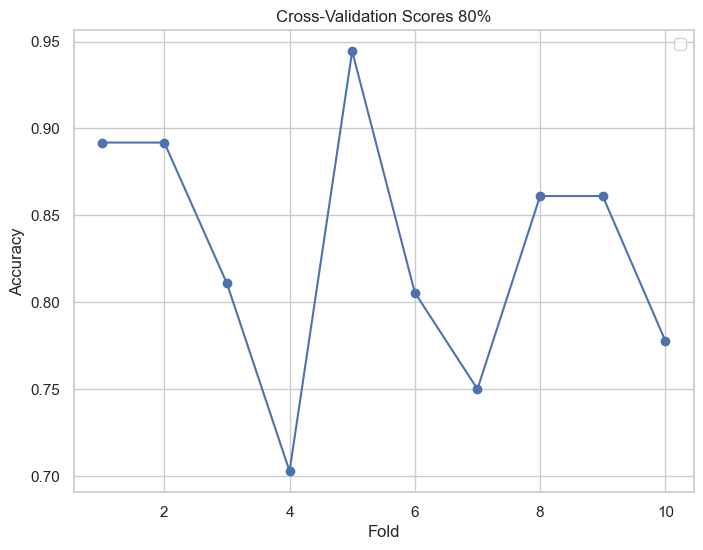

In [102]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rd_forest_clf, X, y, cv=10)  # You can adjust the number of folds (cv parameter) as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

cv_scores80 = cv_scores
# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores 80%')
plt.legend()
plt.show()


# Random Forest without Shuffle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
import csv
import collections
import time

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName'] = label_encoder.fit_transform(data['MapName'])

data['Player1_Race'] = label_encoder.fit_transform(data['Player1_Race'])
data['Player2_Race'] = label_encoder.fit_transform(data['Player2_Race'])


In [3]:
# Define features (X) and target variable (y)
X = data.drop(['Winner'], axis=1)
y = data['Winner']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=False) # 70% training and 30% test

In [5]:
X_train.value_counts("ReplayID").count()

260

In [6]:
clf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=47,max_features=13, min_samples_split=21, random_state=6)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=47,
                       max_features=13, min_samples_split=21, random_state=6)

In [7]:
# Results
pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, pred))

Accuracy: 0.7168761069410475


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=False) # 70% training and 30% test

In [11]:
clf = RandomForestClassifier(n_estimators=100)
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(10, 300),
              "max_features": sp_randint(5, 200),
              "min_samples_split": sp_randint(2, 50),
              "bootstrap": [False],
              "criterion": ["gini", "entropy"],
             "random_state":sp_randint(0, 15)}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, n_jobs = -1, verbose=True)

start = time.time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchCV took 954.01 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.718 (std: 0.040)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 198, 'max_features': 18, 'min_samples_split': 45, 'random_state': 2}

Model with rank: 2
Mean validation score: 0.713 (std: 0.056)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 136, 'max_features': 37, 'min_samples_split': 16, 'random_state': 7}

Model with rank: 3
Mean validation score: 0.713 (std: 0.044)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 133, 'max_features': 44, 'min_samples_split': 6, 'random_state': 10}



In [17]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=198, max_features=18,
                       min_samples_split=45, random_state=2)

In [18]:
clf = RandomForestClassifier(bootstrap=False, max_depth=198, max_features=18,min_samples_split=45, random_state=2)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=198, max_features=18,
                       min_samples_split=45, random_state=2)

In [19]:
# Results
pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, pred))

Accuracy: 0.6857833628517612
